In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nrand

In [2]:
def isline(dots):
    '''
    if dots are on the straight line
    '''
    var = np.var(dots, axis=0)
    if np.sum(var == 0) > 0:
        return True
    else:
        return False

In [3]:
def setcolor(color):
    '''
    color -- color of the pattern
    return function 'draw_polygon' that takes the input 'color' as default argument.
    '''
    def draw_polygon_set_color(dots,mid_point_usage,midpoint):
        '''
        dots -- list of ordered randomized points in one sub-square
                keys: ['11','12','21','22'], the first digit 1: left, 2: right, the second digit 1: lower, 2: upper
        mid_point_usage -- if the middle point is used in polygon drawing
        midpoint -- the coordinate of the middle point of the sub-square
        '''
        # if middle point is used in drawing the polygon
        if mid_point_usage == True:
            
            # if only have 2 dots, then only draw one triangle
            if len(dots) == 2 and sum((dots[0]+dots[1])/2 != midpoint):
                line2 = plt.Polygon([dots[0],dots[1],midpoint], closed=True, fill=True, edgecolor=color,facecolor = color)
                plt.gca().add_line(line2)
            
            # if have 3 dots, then draw three triangles to make sure the polygon is in good shape
            elif len(dots) == 3:
                line2 = plt.Polygon([dots[0],dots[1],midpoint], closed=True, fill=True, edgecolor=color,facecolor = color)
                line3 = plt.Polygon([dots[0],dots[2],midpoint], closed=True, fill=True, edgecolor=color,facecolor = color)
                line4 = plt.Polygon([dots[1],dots[2],midpoint], closed=True, fill=True, edgecolor=color,facecolor = color)
                plt.gca().add_line(line2)
                plt.gca().add_line(line3)
                plt.gca().add_line(line4)
        
        # if middle point is not used, just draw the polygon using ordered dots.
        
        elif len(dots)>2 and (not isline(dots)):
            line = plt.Polygon(dots, closed=True, fill=True, edgecolor=color,facecolor = color)
            plt.gca().add_line(line)
        
    return draw_polygon_set_color
    

In [4]:
def rotate_2(dots):
    '''
    rotate sub-square to the 2th quadrant
    '''
    return np.vstack((-dots[:,1],dots[:,0])).T

def rotate_3(dots):
    '''
    rotate sub-square to the 3th quadrant
    '''
    return -dots

def rotate_4(dots):
    '''
    rotate sub-square to the 4th quadrant
    '''
    return np.vstack((dots[:,1],-dots[:,0])).T

def adjust_pos(dots,pos,quadrant):
    '''
    adjust the positon of the sub-square pattern
    dots -- dictionary of randomized points in one square
            keys: ['11','12','21','22'], the first digit 1: left, 2: right, the second digit 1: lower, 2: upper
    pos -- the relative position of the sub-square
    midpoint -- the coordinate of the middle point of the sub-square
    quadrant -- specify drawing pattern in with quadrant [1,2,3,4]
    '''
    x,y = pos
    midpoint = {}
    
    # initiate midpoint for each sub-square
    midpoint['11'] = [x+1,y+1]
    midpoint['12'] = [x+1,y+3]
    midpoint['21'] = [x+3,y+1]
    midpoint['22'] = [x+3,y+3]
    
    # adjust the positon of the square pattern for upper-right quater
    for i in ['11','12','21','22']:
        dots[i] = dots[i] + [x,y]
        
    # adjust the positon of the square pattern for upper-left quater
    if quadrant == 2:
        for i in ['11','12','21','22']:
            dots[i] = rotate_2(dots[i])
            midpoint[i] = [-midpoint[i][1],midpoint[i][0]]
    
    # adjust the positon of the square pattern for lower-left quater
    elif quadrant == 3:
        for i in ['11','12','21','22']:
            dots[i] = rotate_3(dots[i])
            midpoint[i] = [-midpoint[i][0],-midpoint[i][1]]
    
    # adjust the positon of the square pattern for lower-right quater
    elif quadrant == 4:
        for i in ['11','12','21','22']:
            dots[i] = rotate_4(dots[i])
            midpoint[i] = [midpoint[i][1],-midpoint[i][0]]

    return (dots,midpoint)
    

In [5]:
def draw_quater(dots,mid_point_usage,pos,quadrant):
    '''
    dots -- dictionary of randomized points in one square
            keys: ['11','12','21','22'], the first digit 1: left, 2: right, the second digit 1: lower, 2: upper
    mid_point_usage -- if the middle point is used in polygon drawing
    pos -- the relative position of the sub-square
    midpoint -- the coordinate of the middle point of the sub-square
    quadrant -- specify drawing pattern in with quadrant [1,2,3,4]
    '''
    
    # adjust the positon of the sub-square pattern
    dots,midpoint = adjust_pos(dots.copy(),pos,quadrant)

    # draw sub-square pattern
    for i in ['11','12','21','22']:
        draw_polygon(dots[i],mid_point_usage[i], midpoint[i])


In [6]:
def quater_initiate(n):
    '''
    n -- number of points to randomize
    dots -- list of randomized points
    dots_ordered -- list of non-redundant points within a certain order for pyplot to draw the polygon
    coordinate -- a np.array of points search through
    mid_point_usage -- if the middle point is used in polygon drawing
    '''
    dots = []
    dots_ordered = []
    coordinate = np.array([[0,0],[0,1],[0,2],[1,2],[2,2],[2,1],[2,0],[1,0]])
    mid_point_usage = False
    
    # initiate dots' coordinates randomly
    for i in range(n):
        dots.append([nrand.randint(3),nrand.randint(3)])
    
    # search dots clockwisely along with the sub-square's perimeter, (which is the order in 'coordinate')
    # if exist in 'dots'. append it to 'dots_ordered'
    for i in coordinate:
        if list(i) in dots:
            dots_ordered.append(i)
    
    # set mid_point_usage
    if [1,1] in dots:
        mid_point_usage = True
        
    # if all dots are at middle point, give it one dot [0,0], otherwise would cause error. Quite dirty. 
    if len(dots_ordered) == 0:
        dots_ordered.append([0,0])
        mid_point_usage = False
    
    #convert dots_ordered to be np.array
    dots_ordered = np.array(dots_ordered)
    
    return (dots_ordered,mid_point_usage)

In [7]:
def center_initiate(n):
    '''
    n -- number of points to randomize
    dots -- dictionary of randomized points in one square
            keys: ['11','12','21','22'], the first digit 1: left, 2: right, the second digit 1: lower, 2: upper
    mid_point_usage -- if the middle point is used in polygon drawing
    quadrant -- specify drawing pattern in with quadrant [1,2,3,4]
    '''
    #initiate the same pattern for all sub-squares.
    dots_tmp, mid_point_usage_tmp = quater_initiate(n)
    dots = {}
    mid_point_usage = {}
    for i in ['11','12','21','22']:
        mid_point_usage[i] = mid_point_usage_tmp
    
    #adjust to correct coordinate, mirror the image.
    dots['11'] = dots_tmp
    dots['12'] = np.vstack((dots_tmp[:,0],4-dots_tmp[:,1])).T
    dots['21'] = np.vstack((4-dots_tmp[:,0],dots_tmp[:,1])).T
    dots['22'] = np.vstack((4-dots['12'][:,0],dots['12'][:,1])).T
    
    #draw side square pattern in all 4 quadrant
    for quadrant in range(1,5):
        draw_quater(dots.copy(),mid_point_usage,(0,0),quadrant)


In [8]:
def side_initiate(n):
    '''
    n -- number of points to randomize
    dots -- dictionary of randomized points in one square
            keys: ['11','12','21','22'], the first digit 1: left, 2: right, the second digit 1: lower, 2: upper
    mid_point_usage -- if the middle point is used in polygon drawing
    quadrant -- specify drawing pattern in with quadrant [1,2,3,4]
    '''
    dots = {}
    mid_point_usage = {}
    
    #initiate pattern for each sub-square
    for i in ['11','12','21','22']:
        dots[i],mid_point_usage[i] = quater_initiate(n)
    
    #adjust to correct coordinate
    dots['12'] = dots['12'] + [0,2]
    dots['21'] = dots['21'] + [2,0]
    dots['22'] = dots['22'] + [2,2]
    
    #draw side square pattern in all 4 quadrant
    for quadrant in range(1,5):
        draw_quater(dots.copy(),mid_point_usage,(0,4),quadrant) # draw upper-left square pattern
        draw_quater(dots.copy(),mid_point_usage,(4,0),quadrant) # draw lower-right square pattern
    

In [9]:
def corner_initiate(n):
    '''
    n -- number of points to randomize
    dots -- dictionary of randomized points in one square
            keys: ['11','12','21','22'], the first digit 1: left, 2: right, the second digit 1: lower, 2: upper
    mid_point_usage -- if the middle point is used in polygon drawing
    quadrant -- specify drawing pattern in with quadrant [1,2,3,4]
    '''
    dots = {}
    mid_point_usage = {}
    
    #initiate pattern for each sub-square
    for i in ['11','12','21','22']:
        dots[i],mid_point_usage[i] = quater_initiate(n)
    
    #adjust to correct coordinate
    dots['12'] = dots['12'] + [0,2]
    dots['21'] = dots['21'] + [2,0]
    dots['22'] = dots['22'] + [2,2]
    
    #draw corner square pattern in all 4 quadrant
    for quadrant in range(1,5):
        draw_quater(dots.copy(),mid_point_usage,(4,4),quadrant)
    
    
    
    

In [10]:
def Generate_avatar(n_center = nrand.randint(3,10), n_side = nrand.randint(3,10), n_corner = nrand.randint(3,10), color = None):
    '''
    The whole avatar is divided to 4 quater, (upper-left, upper-right, lower-left, lower-right).
    The 4 quaters have identical pattern , all the other 3 quater can be generated by rotating the left one by 90, 180, 270 degree.
    Here I focus on upper-right quater first, then do rotation to draw other quaters.
    The upper-right quater can be further divided into 4 squares (upper-left, upper-right, lower-left, lower-right),
    by observation of the Github avatar style, 
    the upper-left square is identical to lower-right square, and lower-left square is symmetric with respect to the x and y axis.
    So for lower-left square, we can divide it to 4 sub-square and only generate pattern for one sub-square.
    For upper-left and lower-right square, we generate the same pattern for one of them.
    '''
    #set plot size and scale
    plt.rcParams["figure.figsize"] = (10,10)
    plt.xlim(-8,8)
    plt.ylim(-8,8)
    
    # set avatar's color. setcolor() will generate a function that takes the input 'color' as default argument.
    # so 'color' don't need to be passed down through initiate function.
    global draw_polygon
    draw_polygon = setcolor(color)
    
    #initiate center square (4 squares)
    center_initiate(n_center)
    
    #initiate side square (8 squares)
    side_initiate(n_side)
    
    #initiate corner square (4 squares)
    corner_initiate(n_corner)
    
    #show avatar
    plt.show()

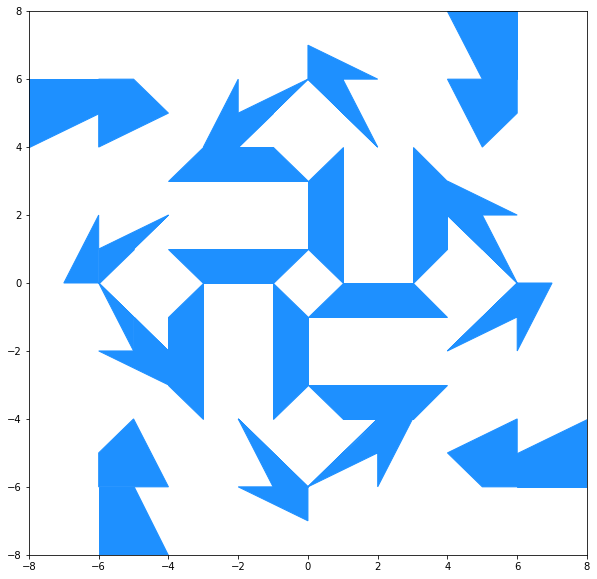

In [261]:
'''
Generate_avatar(n_center = nrand.randint(3,10), n_side = nrand.randint(3,10), n_corner = nrand.randint(3,10), color = None)
Parameter:
    n_center -- number of points to randomize in center square
                defalut: nrand.randint(3,10)
    n_side -- number of points to randomize in side square
              defalut: nrand.randint(3,10)
    n_corner -- number of points to randomize in corner square
                defalut: nrand.randint(3,10)
    color -- color of the pattern
             default: None (blue)
'''
Generate_avatar(color='#1E90FF')